## Midterm PHYS248/MATH248
March 2nd, 2018

Create a new directory in the top level of your own repo called `midterm`. Copy this midterm notebook into that new `midterm` directory and commit this initial version to your repo. Then keep adding answers to that notebook and commit occasionally to save your work. We will pull all repos at the end of the test and grade the version present in your repo at that time.

You may not ask the TAs any questions concerning the content of the exam. They are only allowed to help with any server or git issues.

You can use any course materials, your own past notes and work as well as any documentation of python tools that can be found on the internet. It is strictly prohibited that you communicate with anyone during the exam by any means.

### 1.1
Define the function $g(x) = a x^2 + bx +c$ for $a=-1/2$, $b=2$ and $c=1$  using the Python `lambda` construct.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sp

In [3]:
a = -1/2
b = 2
c = 1
g = lambda x: a*x**2 + b*x + c

### 1.2
Plot the function in the interval $x \in [-2,3]$.

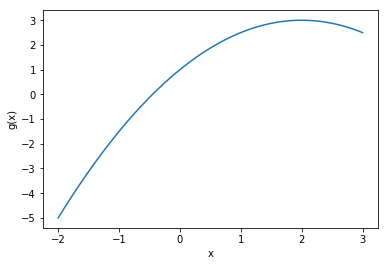

In [4]:
domain = np.linspace(-2, 3, 100)
plt.plot(domain, g(domain))
plt.xlabel("x")
plt.ylabel("g(x)")

### 1.3
Devise and implement an algorithm that integrates $g$ in the given interval using the trapezoidal rule. 
1. Start by making a bar plot that demonstrates the integration method for dividing the integration interval into $n=4$ grid zones $\Delta x$ (Riemann sum for $n=4$).
2. Create a Pyhton function called `int_trap` that takes the function name to be integrated and an x array along which the integration is to be performed as an argument and returns the area under the curve. 

1.66666666667
[-2.         -0.33333333  1.33333333  3.        ]


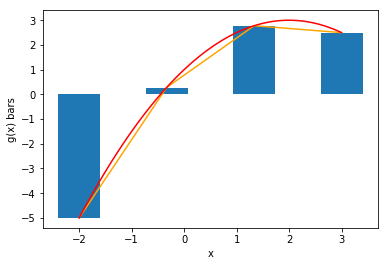

In [5]:
# bar(x, height, width, *, align='center', **kwargs)
# really these should be trapezoids, but their area is equal to the rectangle, which is why I assume we just have to do
#  a bar plot.
dom = np.linspace(-2,3,4)
print(dom[1]-dom[0])
print(dom)
plt.plot(dom, g(dom), 'orange')
plt.plot(domain, g(domain), 'r')
plt.bar(dom, g(dom))
plt.xlabel("x")
plt.ylabel("g(x) bars")

In [11]:
def int_trap(f, xb):
    """
    Return numeric integral via trap rule of a function
    
    Parameters
    ---------
    
    f : function
        input function to integrate
    
    xb : array-like
        input bounds
    """
    total = 0
    step = abs(xb[0] - xb[1])
    for i, number in enumerate(xb):
        try:
            average_height = (g(number) + g(xb[i+1]))/2
            total += average_height*(step)
        except Exception as ex:
            pass  # no more trap rule iterations beyond right boundary
    
    return total

xb = np.linspace(-2, 3, 100)
print(int_trap(f, xb))

4.16560384995
<_io.TextIOWrapper name='sunspots.txt' mode='r' encoding='ANSI_X3.4-1968'>


### 1.4
Perform the same integral using a _scipy_ library.

In [6]:
integrate.quad(g, -2, 3)
# returns a tuple with the value and then the uncertainty

(4.166666666666666, 1.256677553914146e-13)

### 1.5 
Perform the same integral using Sympy.  Print the antiderivative and evaluate the definite integral.


In [7]:
x = sp.symbols('x')
sp.pprint(sp.Eq(sp.Integral(g(x),x), sp.integrate(g(x))) )
sp.integrate(g(x), (x, -2, 3))

⌠                                                                  
⎮ ⎛       2          ⎞                           3        2        
⎮ ⎝- 0.5⋅x  + 2⋅x + 1⎠ dx = - 0.166666666666667⋅x  + 1.0⋅x  + 1.0⋅x
⌡                                                                  


4.16666666666667

### 1.6
Comment on how the three solutions of performing this integral compare. If they are not the same comment on why this may be the case.

Answer: Sympy and Scipy have nearly the same values, with slight roundoff in the least significant bit. The trap rule is less accurate, but will have a comparable answer once the step size is reduced (increasing the number of trapezoids)

### 2.1
In the midterm directory you find a file `sunspots.txt` which contains the observed number of sunspots for each month since 1749. The file contains two columns with the month number and the sunspot number.

Load the data and make a graph of sunspot number as a function of month.  The arrays for month and number of sunspots are to be called `month` and `nr_sunsp`. Determine how many data point pairs are in the data set. 

Create a downsampled data sets `month_sparse` and `nr_sunsp_sparse` by retaining only every $15^\mathrm{th}$ data pair. In other words, keep the first data pair, then skip 14, then keep the 15th, and so on.

Plot both the down-sampled data set and the original data set for month 900 to 1700.

In [63]:
import numpy as np

In [73]:
data = np.loadtxt('sunspots.txt')

In [74]:
x = data[:, 0]
y = data[:, 1]

In [75]:
x[5]

5.0

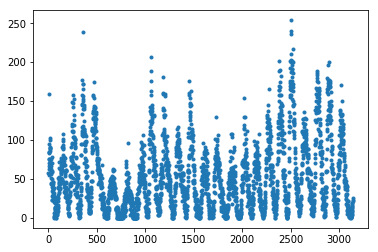

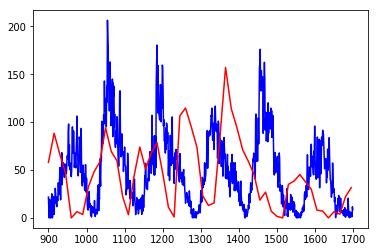

In [59]:
# I'm doing part 2 anyways
f = open("sunspots.txt", "r")
months = []
nr_sunsp = []
month_sparse = []
nr_sunsp_sparse = []
count = 0
for line in f:
    month, spot = line.split("\t")
    month = float(month)
    spot = float(spot.rstrip())
    months.append(month)
    nr_sunsp.append(spot)
    if count % 15 == 0:
        month_sparse.append(month)
        nr_sunsp_sparse.append(spot)
    count += 1
        
plt.plot(months, nr_sunsp, '.')

figure()
new_month = []
new_sun = []
for i, month in enumerate(months[900:1700]):
    if month in month_sparse:
        new_month.append(month)
        new_sun.append(nr_sunsp[i])

"""
for i, month in enumerate(month_sparse):
    if 900 <= month <= 1700:
        new_month.append(month)
        new_sun.append(nr_sunsp[i])
    elif month > 1700:
        break """

plt.plot(months[900:1700], nr_sunsp[900:1700], 'b')
plt.plot(new_month, new_sun, 'r')

### 2.2
Write a function called `run_av` that calculates the running average
$$
X_k = \frac{1}{2l+1} \sum_{m=k-l}^{k+l} x_{k+m}
$$ 
The function takes as argument the array and $l$. Create month and sunspot data arrays from the original data set for $l=30$. Plot this as well in the same plot as in 2.1.

In [49]:
def run_av(arr, l):
    s = 0
    data = []
    for k in range(len(arr)):
        if k < l:
            s = sum(arr[:k+l+1])
        elif k+l > len(arr):
            s = sum(arr[k-l:])
        else:
            s = sum(arr[k-l:k+l+1])
        
        data.append((1/(2*l+1))*s)
    
    return data

y = run_av(nr_sunsp, 30)

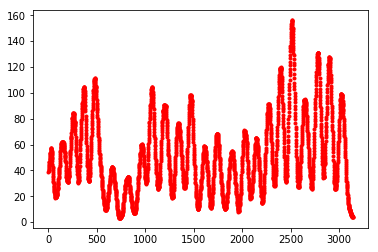

In [62]:
# plt.plot(months, nr_sunsp, 'b.')
plt.plot(months, y, 'r.')

### 2.3
Perform a spline interpolation of the down-sampled data and plot it using the original month data set as the x array. Set smoothing parameter s=1. Overplot into same figure as 2.1

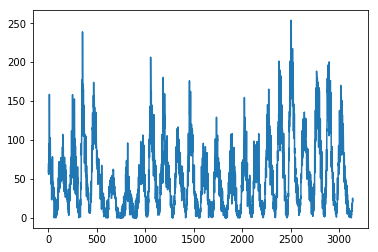

In [77]:
from scipy import interpolate

tck = interpolate.splrep(months, y, s=1)
yy = interpolate.splev(months, tck, der=0)
plt.plot(months, interpolate.splev(months, tck, der=0))

 Do you recognize the 11-year solar cycle? (Not a graded question ;-)